In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from matplotlib.colors import ListedColormap

# Notes:

T = MC_steps = L

L = minimum 100

instead of animation provide a matrix with road on x axis and time on y axis
(for three different values p, ro, 3x3 subplots for every combination)

average velocity depending on ro parameter (mean over all cars over all times (if we don't have v=0 at beggining), (for three different vals of p))

at the beggining all cars have v = v_max = 5, or randint (but rather 5)

In [62]:
class NagelSchreckenberg:
    #0 - empty cell, n - car speed
    def __init__(self, p, ro, road_length):
        self.p = p
        self.ro = ro
        self.max_velocity = 5
        self.road_length = road_length
        self.road = np.zeros(road_length)

    def initialize_road_with_cars(self):
        num_of_cars = int(self.ro*self.road_length)
        car_indices = random.choices(list(range(0, self.road_length)), k=num_of_cars)
        for index in car_indices:
            self.road[int(index)] = 5

    def get_road_slice(self, car):
        velocity = self.road[car]
        if car+velocity+1 >= self.road_length:
            part1 = self.road[int(car+1):]
            part2 = self.road[0:int((car+velocity+1)%self.road_length)]
            road_slice = [j for i in [part1, part2] for j in i]
        else:
            road_slice = self.road[int(car+1):int(car+velocity+1)]
        return road_slice
    
    def simulate_and_save_new(self, number_of_MC_steps):
        self.initialize_road_with_cars()
        results = [self.road]
        avg_velocity = 0

        for _ in range(number_of_MC_steps):
            car_indices = np.where(np.array(self.road) != 0)[0]

            # steps 1, 2, 3:
            for car in car_indices:
                velocity = self.road[car]
                if velocity < self.max_velocity:
                    self.road[car] = velocity + 1
                road_part = self.get_road_slice(car)
                next_cars = np.where(np.array(road_part) != 0)[0]
                if len(next_cars) != 0:
                    self.road[car] = next_cars[0]
                if random.random() < self.p:
                    self.road[car] = self.road[car]-1 if self.road[car] > 1 else self.road[car]

            # move cars:
            for car in car_indices:
                velocity = self.road[car]
                new_car_place = int(car+velocity) if car+velocity < self.road_length else int(car+velocity)%self.road_length
                self.road[new_car_place] = velocity
                self.road[car] = 0
            results = np.concatenate((results, [self.road]), axis=0)

            avg_velocity += np.sum(self.road)/len(np.where(np.array(self.road)!=0)[0])

        avg_velocity /= number_of_MC_steps

        return avg_velocity, results


In [63]:
def create_results(ps, rhos, L=100, T=100):
    if len(ps) != 3 or len(rhos) != 3:
        raise ValueError("Parameters lists must be of len equal to three")
    else:
        fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(13, 13))
        for i, p in enumerate(ps):
            for j, rho in enumerate(rhos):
                NS = NagelSchreckenberg(p, rho, L)
                _, result = NS.simulate_and_save_new(T)
                result[np.where(result != 0)] = 1
                new_result = np.delete(result, 0, 0)
                sns.heatmap(new_result, ax=axs[i, j], square=True, cbar=False, cmap=ListedColormap(['white', 'black']), yticklabels=False, xticklabels=False)
                axs[i, j].set_title(rf"$p={p}, \rho={rho}$")

    plt.savefig("images/system_evolution.png")


In [71]:
def avg_velocity(ps, rhos, L=100, T=100):
    plt.figure(figsize=(13, 8))
    markers = ["+", "*", "D"]
    for j, p in enumerate(ps):
        velocities = np.zeros(len(rhos))
        for i, rho in enumerate(rhos):
            NS = NagelSchreckenberg(p, rho, L)
            velocities[i] = NS.simulate_and_save_new(T)[0]
        plt.plot(rhos, velocities, marker=markers[j], markersize=4, label=rf"$p={p}$")

    plt.xlabel(rf"$\rho$")
    plt.ylabel("Average velocity")
    plt.title(rf"Average velocity as a function of $\rho$")
    plt.legend()
    plt.savefig("images/avg_velocity.png")



In [72]:
ps = [0.3, 0.5, 0.7]
ros = [0.1, 0.2, 0.6]

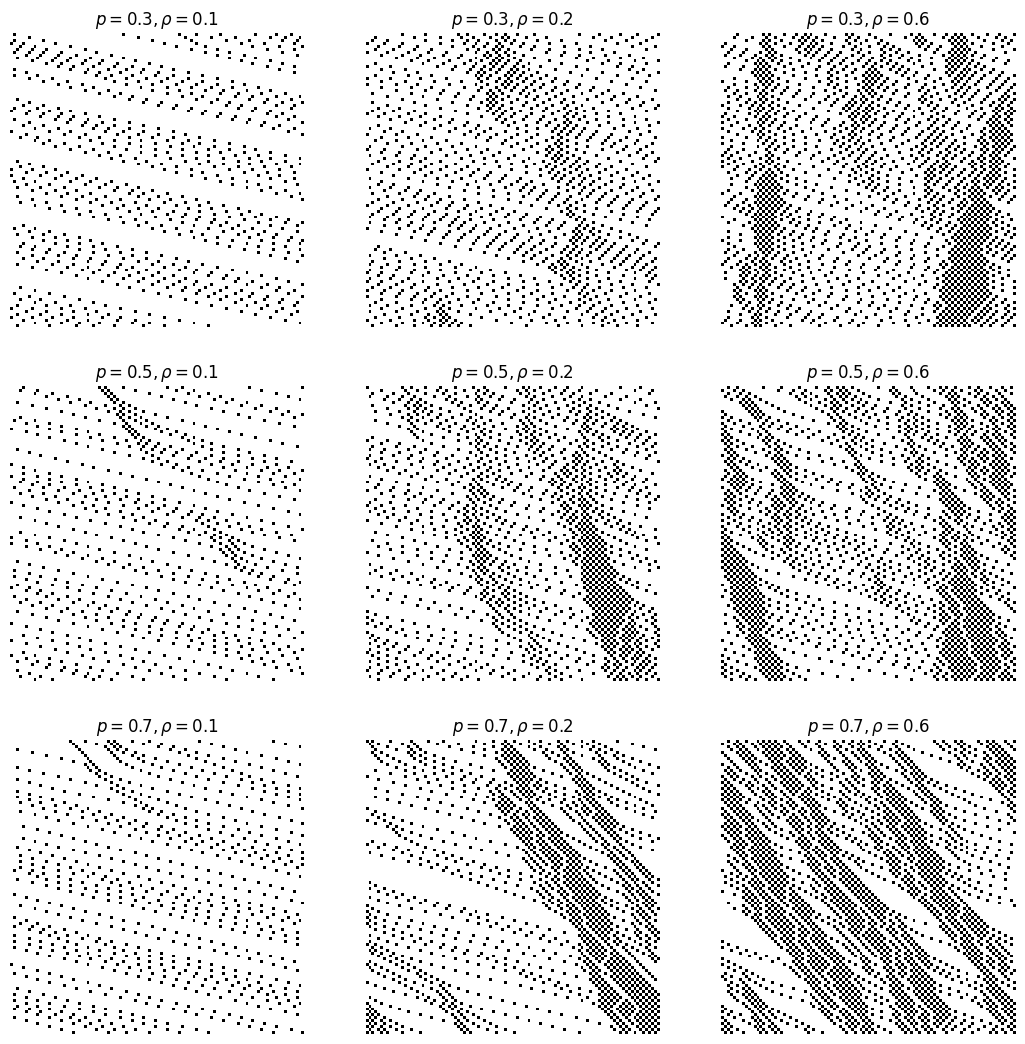

In [36]:
create_results(ps, ros)

In [79]:
rhos = np.arange(0.1, 0.7, 0.05)

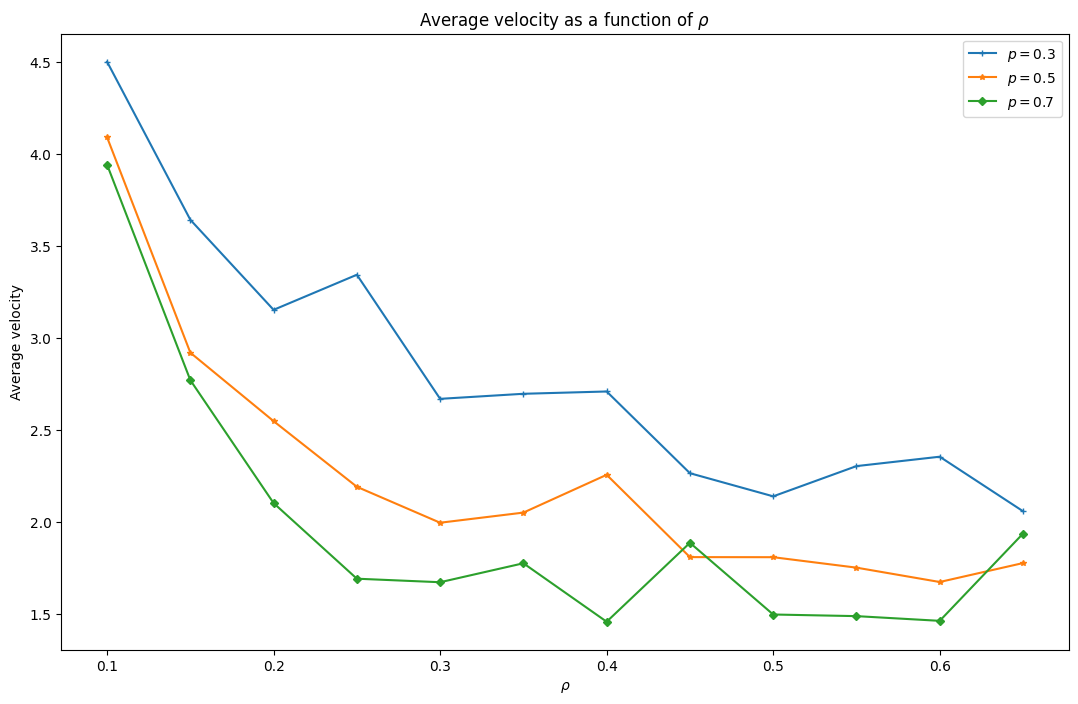

In [81]:
avg_velocity(ps, rhos)